<a href="https://colab.research.google.com/github/mariagichomo/Fraud-detection/blob/main/Fraud_detection_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


client_df = pd.read_csv("drive/MyDrive/Data/train/client_train.csv")


In [3]:
client_df.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [4]:
invoice_df = pd.read_csv("drive/MyDrive/Data/train/invoice_train.csv",low_memory=False)

In [5]:
invoice_df.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [6]:
client_df.isnull().values.any()

False

In [7]:
invoice_df.isnull().values.any()

False

In [8]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  int64  
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object 
 5   target         135493 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.2+ MB


In [9]:
invoice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
 15  counter_type          object
dtypes: int64(12), object(4)
memory usage: 546.5+ MB


In [10]:
client_df.duplicated().values.any()

False

In [11]:
invoice_df.duplicated().values.any()

True

In [12]:
invoice_df.shape

(4476749, 16)

In [13]:
invoice_duplicates = invoice_df[invoice_df.duplicated(keep=False)]
print(invoice_duplicates)

                   client_id invoice_date  tarif_type  counter_number  \
951890   train_Client_125864   2011-12-12          11          101545   
951893   train_Client_125864   2011-12-12          11          101545   
1755789   train_Client_25894   2010-07-13          40         6986740   
1755798   train_Client_25894   2010-07-13          40         6986740   
2137995    train_Client_3636   2012-01-18          40          312650   
2137999    train_Client_3636   2012-01-18          40          312650   
2163371   train_Client_37069   2010-10-11          11            5284   
2163374   train_Client_37069   2010-10-11          11            5284   
2433907   train_Client_44407   2008-02-28          11           66921   
2433919   train_Client_44407   2008-02-28          11           66921   
2805727   train_Client_54609   2010-04-06          11          200912   
2805729   train_Client_54609   2010-04-06          11          200912   
3260190   train_Client_66981   2006-07-17          

In [14]:
invoice_df=invoice_df.drop_duplicates()

In [15]:
invoice_df.duplicated().any()

False

In [16]:
client_df.shape

(135493, 6)

In [17]:
invoice_df.shape

(4476738, 16)

In [18]:
client_df.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [19]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  int64  
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object 
 5   target         135493 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.2+ MB


In [20]:
count = client_df['target'].value_counts()
print(count)

0.0    127927
1.0      7566
Name: target, dtype: int64


Text(0.5, 1.0, 'Count of Fraud and Non-Fraud in Target Column')

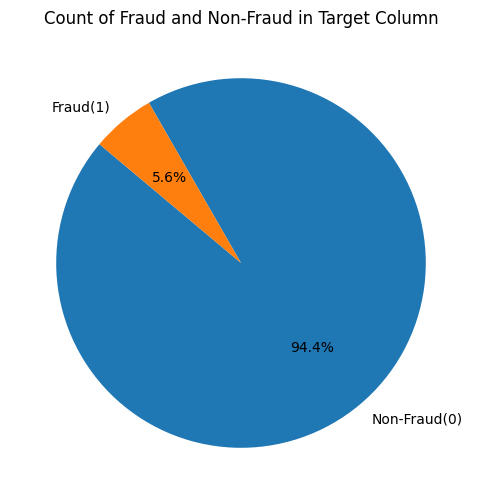

In [21]:
# Create a pie chart


plt.figure(figsize=(6,6))
plt.pie(count, labels=['Non-Fraud(0)', 'Fraud(1)'],autopct='%1.1f%%', startangle=140)

plt.title('Count of Fraud and Non-Fraud in Target Column')


In [40]:
client_df['client_id'].isin(invoice_df['client_id']).values.any()

True

In [50]:
merged_df = pd.merge(client_df,invoice_df, on='client_id',how = 'inner')
merged_df.head()

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,60,train_Client_0,11,101,31/12/1994,0.0,2014-03-24,11,1335667,0,...,8,1,82,0,0,0,14302,14384,4,ELEC
1,60,train_Client_0,11,101,31/12/1994,0.0,2013-03-29,11,1335667,0,...,6,1,1200,184,0,0,12294,13678,4,ELEC
2,60,train_Client_0,11,101,31/12/1994,0.0,2015-03-23,11,1335667,0,...,8,1,123,0,0,0,14624,14747,4,ELEC
3,60,train_Client_0,11,101,31/12/1994,0.0,2015-07-13,11,1335667,0,...,8,1,102,0,0,0,14747,14849,4,ELEC
4,60,train_Client_0,11,101,31/12/1994,0.0,2016-11-17,11,1335667,0,...,9,1,572,0,0,0,15066,15638,12,ELEC


In [51]:
merged_df.shape

(4476738, 21)

In [52]:
merged_df.isnull().values.any()

False

In [55]:
count2= merged_df['target'].value_counts()
print(count2)

0.0    4123629
1.0     353109
Name: target, dtype: int64


Text(0.5, 1.0, 'Count of Fraud and Non-Fraud in Target Column')

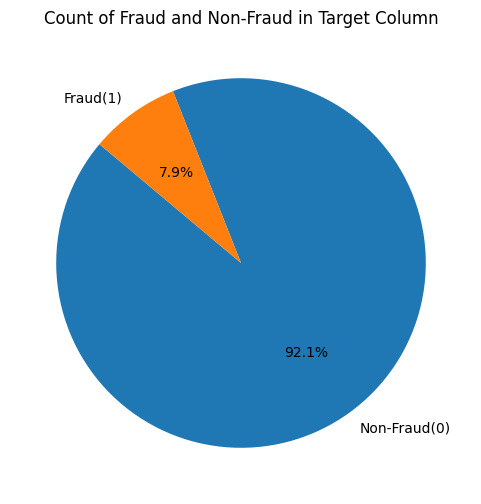

In [56]:
# Create a pie chart


plt.figure(figsize=(6,6))
plt.pie(count2, labels=['Non-Fraud(0)', 'Fraud(1)'],autopct='%1.1f%%', startangle=140)

plt.title('Count of Fraud and Non-Fraud in Target Column')